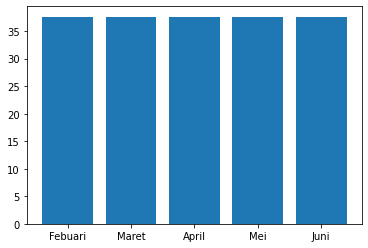

In [77]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('chinook.db')

find_invoices = '''
SELECT InvoiceDate,Total
FROM invoices 
WHERE InvoiceDate 
BETWEEN '2009-02-01 00:00:00' AND '2009-06-31 00:00:00';
'''
bulan = ['Januari','Febuari','Maret','April','Mei','Juni','July']

cursor = connection.cursor()
cursor.execute(find_invoices)

invoices = cursor.fetchall()

def match_month(date):
    date_arr = date.split("-")
    month_num = int(date_arr[1])
    return bulan[month_num-1]


date = [data[0] for data in invoices]
total = [data[1] for data in invoices]

invoice_data = pd.DataFrame({'date': date, 'total': total})
invoice_data["bulan"] = [match_month(date) for date in invoice_data["date"]]
invoice_data_bulan = invoice_data.groupby(["bulan"]).sum()
invoice_data_final = pd.DataFrame(invoice_data_bulan.reindex(bulan).dropna())["total"]

bulan=invoice_data_final.index.get_level_values(0).tolist()
total = [t for t in invoice_data_final]

plt.bar(bulan,total)

connection.commit()
cursor.close()
connection.close()

# Kesimpulan

Semua Penjualan memiliki total yang sama tiap bulannya 